In [2]:
%cd C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor

# imports
import pickle
import os
from pathlib import Path

import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from cartopy import feature as cfeature

from src.utils.data_utils import DataMapping
import src.utils.standard_plots as sp

C:\Users\ehate\Desktop\ASP\ASP_code_projects\ASP_predictor


In [3]:
PREDICTIONS_FOLDER = 'data/processed/predictions/'
#CETB_FOLDER = 'data/raw/CETB_AMSR2/'

# Map data

In [4]:
#CETB_mapping = DataMapping(CETB_FOLDER,'CETB')

# map SD data
sd_files = os.listdir(PREDICTIONS_FOLDER)

sd_df = pd.DataFrame({'date':[], 'filename': []})
for file in sd_files:
    file = Path(os.path.join(PREDICTIONS_FOLDER, file))
    stem = file.stem
    sd_df.loc[len(sd_df)] = [stem.split('_')[-1], file]

# Display some predictions

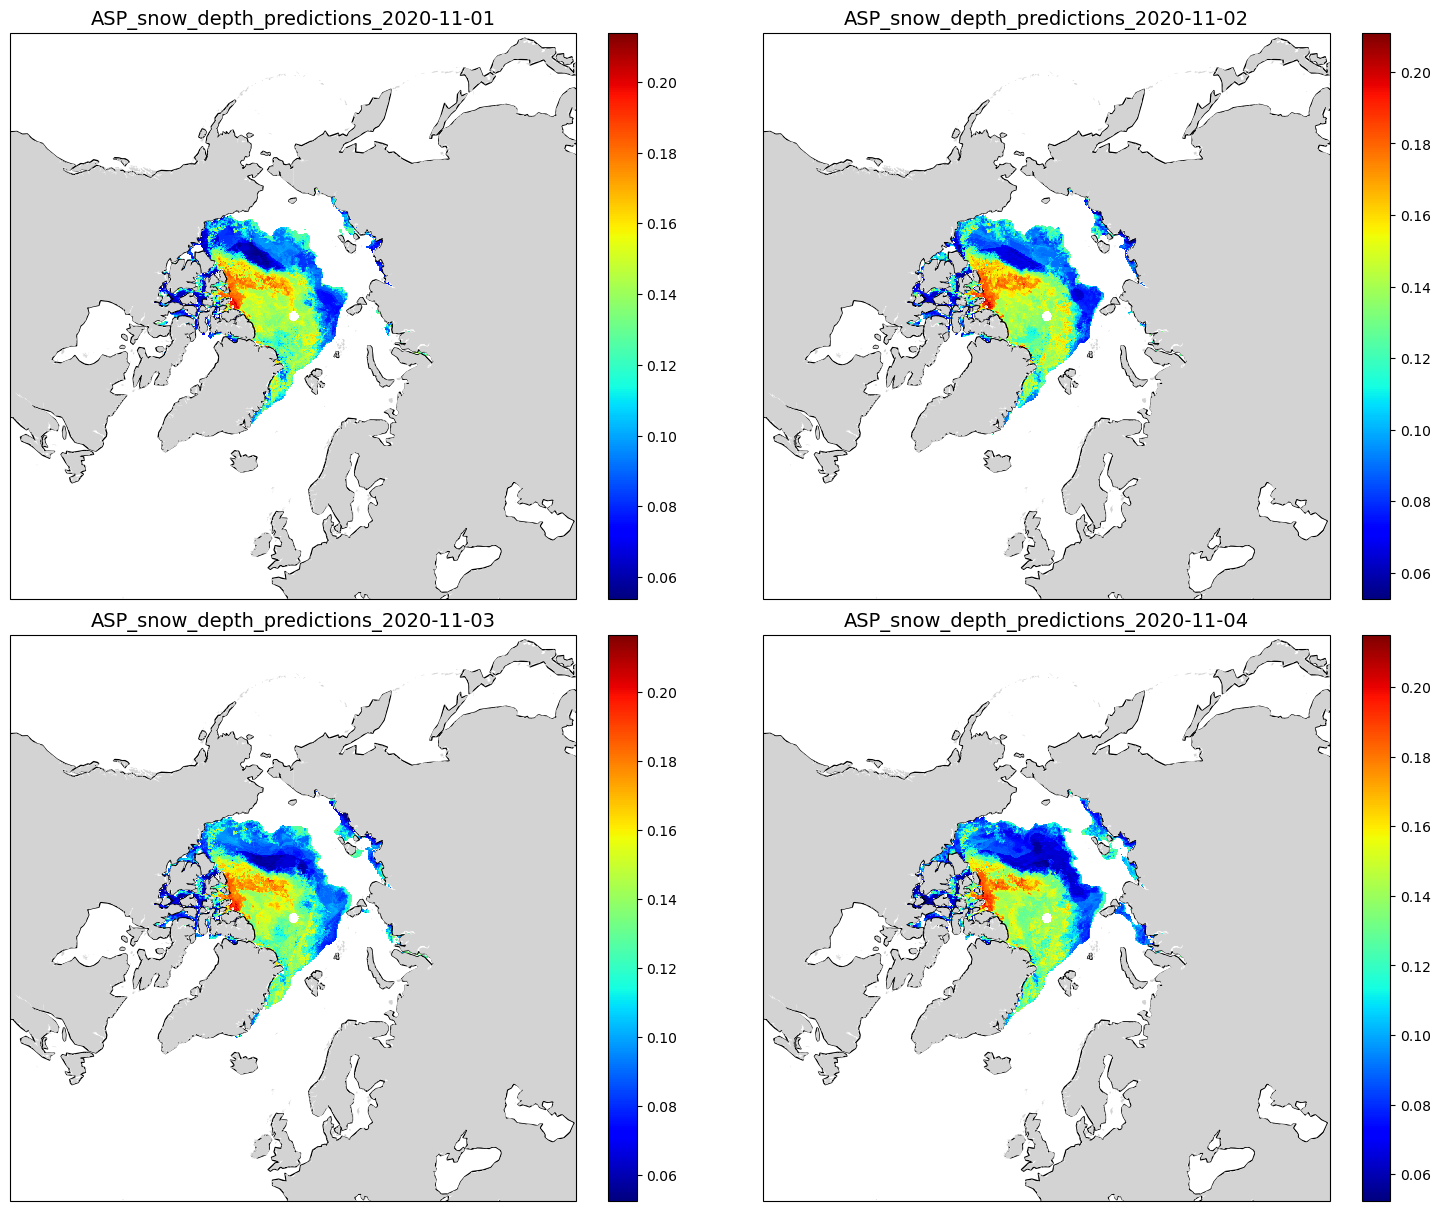

In [9]:
files = [
    'data/processed/predictions/ASP_snow_depth_predictions_2020-11-01.nc',
    'data/processed/predictions/ASP_snow_depth_predictions_2020-11-02.nc',
    'data/processed/predictions/ASP_snow_depth_predictions_2020-11-03.nc',
    'data/processed/predictions/ASP_snow_depth_predictions_2020-11-04.nc',
]
ds = xr.open_mfdataset(files)

fig = plt.figure(figsize=(15,12), constrained_layout=True)
for i, file in enumerate(files):
    ax = sp.polar_pcolormesh(fig, (2,2,i+1),x=ds['x'][::4], y=ds['y'][::4], val=ds['sd'].isel(time=i)[::4,::4], cmap='jet', cbar_kwargs={})
    ax.set_title(f'{Path(file).stem}', fontsize=14)


In [7]:
ds = xr.open_dataset('data/processed/predictions/ASP_snow_depth_predictions_2020-11-01.nc')

for lvl in [0,1, 2, 3, 4, 5,6,7,8,9]:
    ds.to_netcdf(
        f"C:/Users/ehate/Desktop/test/test_lvl{lvl}.nc",
        format='NETCDF4_CLASSIC',
        encoding = {var: {"zlib": True, "complevel": lvl} for var in ["sd", "lat", "lon", "x", "y"]})